Primeiros dados
   popularity  duration_ms  danceability  energy       key  loudness  mode  \
0        0.73     0.044043      0.686294  0.4610  0.090909  0.791392   0.0   
1        0.55     0.028566      0.426396  0.1660  0.090909  0.597377   1.0   
2        0.57     0.040255      0.444670  0.3590  0.000000  0.736123   1.0   
3        0.71     0.038557      0.270051  0.0596  0.000000  0.573701   1.0   
4        0.82     0.037969      0.627411  0.4430  0.181818  0.737103   1.0   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0     0.148187      0.032329          0.000001    0.3580  0.718593  0.361245   
1     0.079067      0.927711          0.000006    0.1010  0.268342  0.318397   
2     0.057720      0.210843          0.000000    0.1170  0.120603  0.313643   
3     0.037617      0.908635          0.000071    0.1320  0.143719  0.746758   
4     0.054508      0.470884          0.000000    0.0829  0.167839  0.492863   

   time_signature track_genre  
0 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

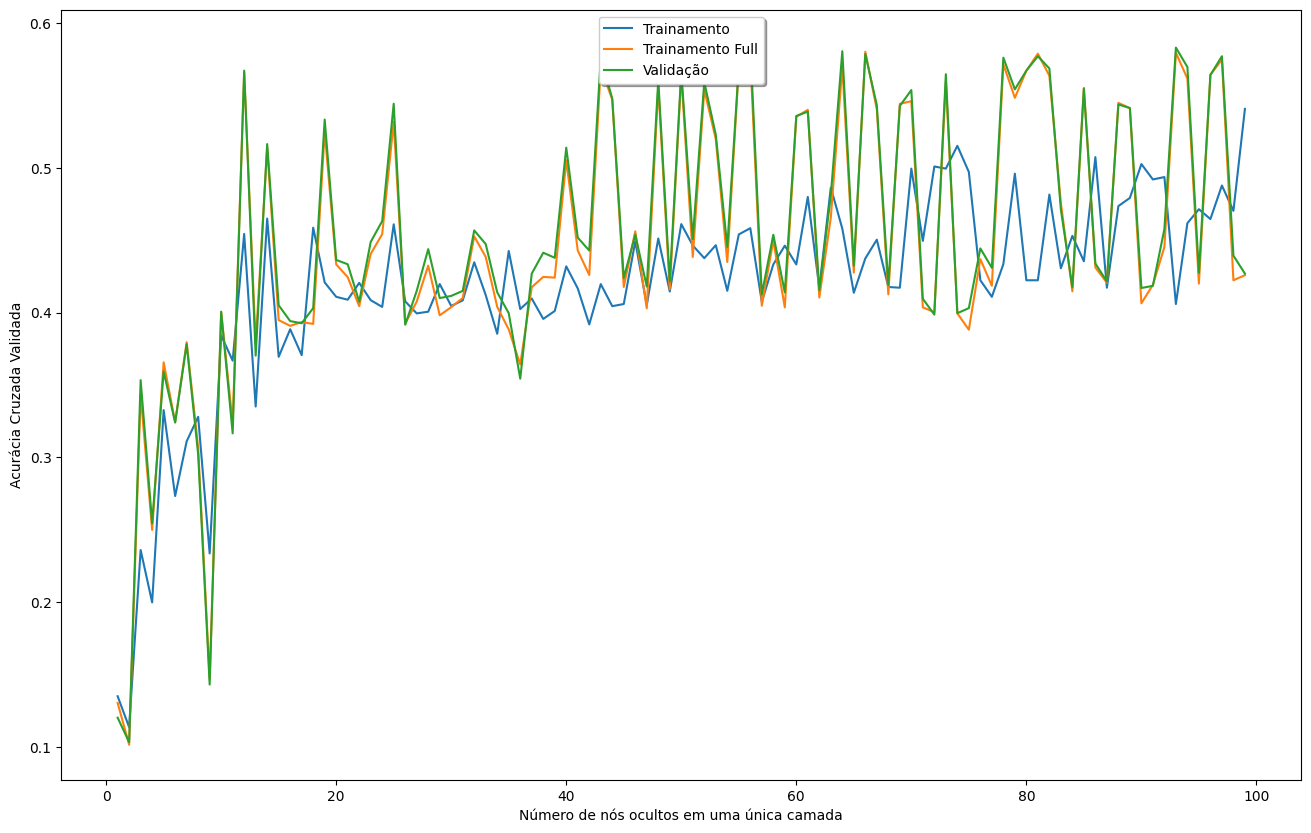

Relatório de Classificação:
              precision    recall  f1-score   support

    acoustic       0.52      0.48      0.50       267
    afrobeat       0.61      0.60      0.61       268
    alt-rock       0.30      0.21      0.25       237
 alternative       0.49      0.61      0.55       249
     ambient       0.77      0.71      0.74       261
       anime       0.45      0.42      0.44       249
 black-metal       0.79      0.89      0.84       247
   bluegrass       0.67      0.78      0.72       237
       blues       0.56      0.38      0.45       251
      brazil       0.51      0.71      0.59       234
   breakbeat       0.66      0.64      0.65       182

    accuracy                           0.58      2682
   macro avg       0.58      0.59      0.58      2682
weighted avg       0.58      0.58      0.57      2682



In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# Ignorar avisos de convergência
simplefilter("ignore", category=ConvergenceWarning)

# Configuração do tamanho da figura
plt.rcParams['figure.figsize'] = [16, 10]

# Definindo os nomes de cada coluna
names = [
    'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature', 'track_genre'
]

# Carregamento dos dados
dataset = pd.read_csv("spotify_dataset.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

# Divisão de dados em atributos e classe
X = dataset.drop('track_genre', axis=1).values  # Todos os atributos, exceto 'track_genre'
Y = dataset['track_genre'].values

# Usando LabelEncoder para garantir que os rótulos estejam no formato correto
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.25, random_state=10)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=10)

# Listas para armazenar os scores
k_scores_train = []
k_scores_train_full = []
k_scores_valid = []

# Uso do MLPClassifier
for k in range(1, 100):
    clf = MLPClassifier(hidden_layer_sizes=(k,), random_state=10, early_stopping=True, n_iter_no_change=5)

    # Cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    k_scores_train.append(scores.mean())

    # Treinamento do modelo completo
    clf.fit(X_train, y_train)
    k_scores_train_full.append(clf.score(X_train, y_train))

    # Score de validação
    k_scores_valid.append(clf.score(X_valid, y_valid))

# Plotando os resultados
plt.plot(range(1, 100), k_scores_train)
plt.plot(range(1, 100), k_scores_train_full)
plt.plot(range(1, 100), k_scores_valid)
plt.legend(('Trainamento', 'Trainamento Full', 'Validação'),
           loc='upper center', shadow=True)
plt.xlabel('Número de nós ocultos em uma única camada')
plt.ylabel('Acurácia Cruzada Validada')
plt.show()

# Avaliação final com métricas
best_k = k_scores_valid.index(max(k_scores_valid)) + 1
clf_best = MLPClassifier(hidden_layer_sizes=(best_k,), random_state=10)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

# Exibir relatório de classificação
print("Relatório de Classificação:")
print(classification_report(label_encoder.inverse_transform(y_test), label_encoder.inverse_transform(y_pred)))